In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
## read the data set
df = pd.read_csv("datafile/height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

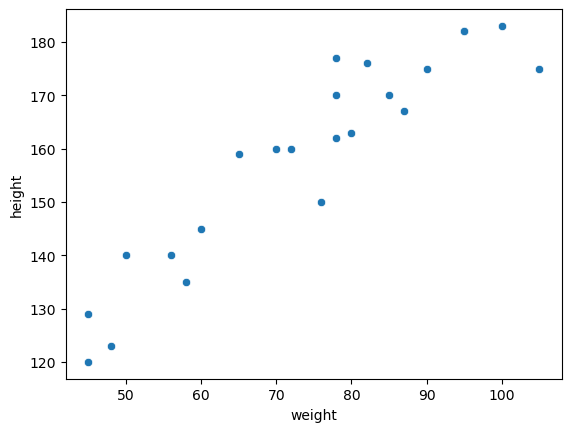

In [3]:
sns.scatterplot(x='Weight', y='Height', data=df)
plt.xlabel("weight")
plt.ylabel("height")

1. Dataset
2. Divide the feature based on independent and dependent features
3. Train Test split
4. standerdize the dataset
5. Training the model using linear regression

In [4]:
## divide my dataset into independent and dependent features
X = df[['Weight']] # independent feature
y = df['Height'] # dependent feature

In [5]:
### Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)
# independent f, dependent f , size of test data part, seed value 

In [6]:
X.shape

(23, 1)

In [7]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [8]:
y_train.shape, y_test.shape

((18,), (5,))

In [9]:
###############################

In [10]:
## standerdize the dataset Train independent data
## basically applying z score formula
scaler = StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train) 
# fit will compute mean and standard std
# transform apply the z score formula on every data point

X_test=scaler.transform(X_test)
# no need to apply fit because it get used from above fit 


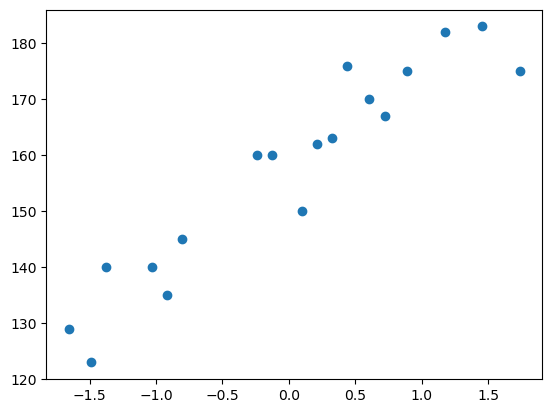

In [13]:
plt.scatter(X_train, y_train)

### fit_transform
- By applying Z score we converted Gaussian Normal Distribution to Standard Normal Distribution and converted [mean to u = 0 and std = 1]

In [16]:
## Train the simple liner regression model
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()

In [18]:
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
print(f"Slope and Coefficient of weight is : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Slope and Coefficient of weight is : [17.03440872]
Intercept : 157.5


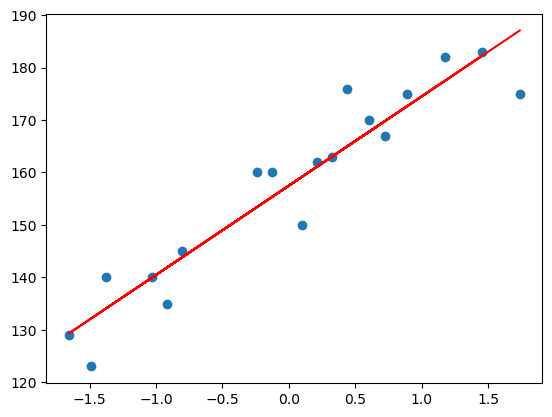

In [25]:
## calculating best fit line [ h0(x) = 0o + (01*x1)]
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

In [26]:
y_pred_test=regressor.predict(X_test)

In [27]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

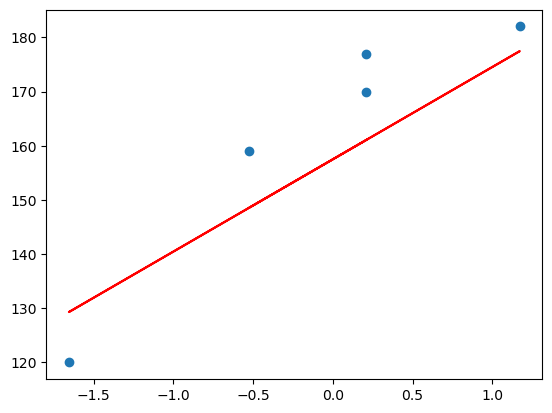

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

## Performance matrix 
## MSE MAE RMSE
## R Square and Adjusted R Square

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
mse=mean_squared_error(y_test, y_pred_test)

In [31]:
mae=mean_absolute_error(y_test, y_pred_test)

In [32]:
rmse = np.sqrt(mse)

In [33]:
print(mse,mae,rmse)

109.77592599051664 9.822657814519232 10.477400726827081


### R square Formula

### R^2 = 1 - SSR/SST

- R^2 = coefficient of determination 
- SSR = sum of squares of residuals 
- SST = total sum of squares

In [34]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred_test)

In [35]:
score

0.776986986042344

### Adjusted R Square
### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

- where:

- R2: The R2 of the model 
- n: The number of observations 
- k: The number of predictor variables

In [37]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [38]:
regressor

LinearRegression()

In [39]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\manal\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [40]:
regressor.predict([scaled_weight[0]])

array([163.01076266])

In [41]:
print(f"The height prediction for weight 80kg is: {regressor.predict([scaled_weight[0]])} ")

The height prediction for weight 80kg is: [163.01076266] 


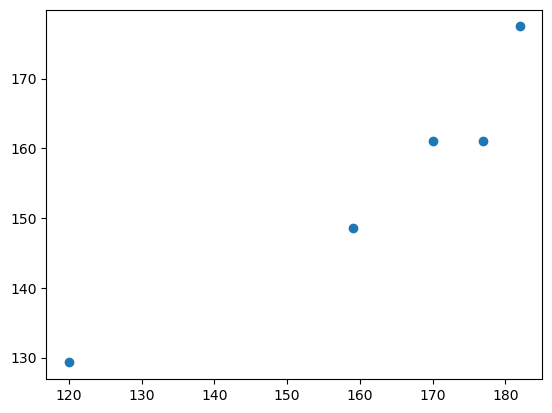

In [42]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [43]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\manal\AppData\Local\Temp\ipykernel_952\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

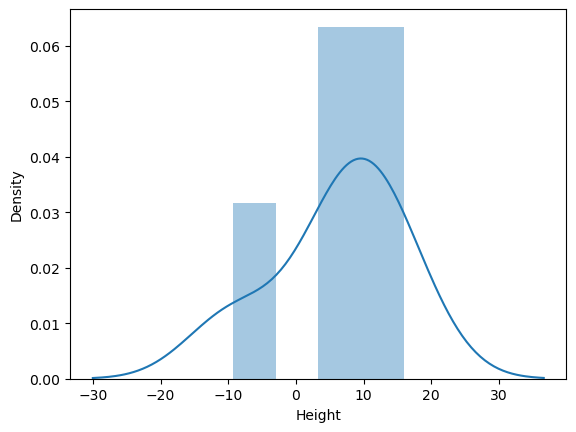

In [44]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

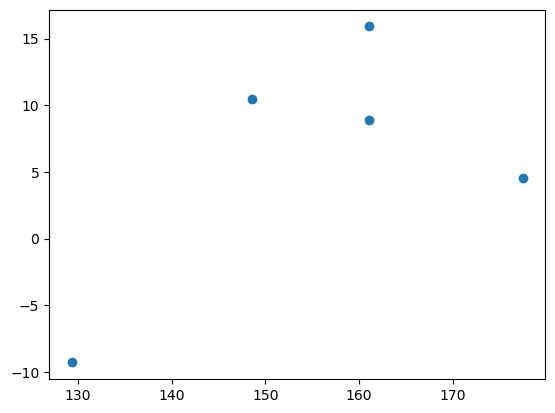

In [45]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)